In [ ]:
import pandas as pd
import bcb
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('CEPEA_20241115084958.xls')

In [24]:
df['Data'] = pd.to_datetime(df['Data'], format="%d/%m/%Y")

In [25]:
df['Ano_mes'] = df['Data'].apply(lambda x: x.strftime('01/%m/%Y'))

In [26]:
lista_datas = list(df['Ano_mes'].unique())
lista_datas.remove('01/11/2024')

In [27]:
df['Ano_mes'] = df['Ano_mes'].astype('datetime64[ns]')

In [28]:
df

,Data,À vista R$,À vista US$,Ano_mes
0,1997-07-23,26.67,24.65,1997-01-07
1,1997-07-24,26.67,24.65,1997-01-07
2,1997-07-25,26.71,24.68,1997-01-07
3,1997-07-28,26.74,24.70,1997-01-07
4,1997-07-29,26.77,24.72,1997-01-07
...,...,...,...,...
6793,2024-11-08,329.05,57.20,2024-01-11
6794,2024-11-11,334.60,57.98,2024-01-11
6795,2024-11-12,335.15,58.11,2024-01-11
6796,2024-11-13,339.60,58.57,2024-01-11


## Gráfico do Preço do Boi Gordo em Reais sem o Ajuste do IPCA

<Axes: >

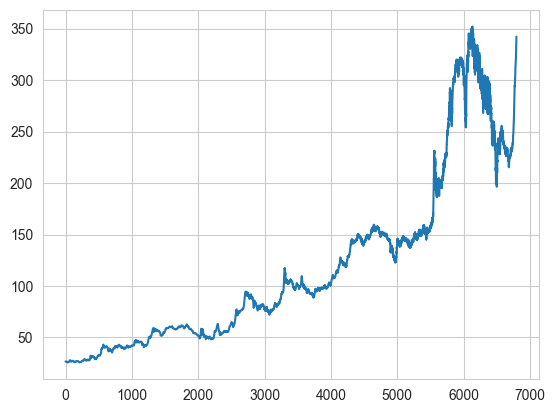

In [29]:
df['À vista R$'].plot(kind='line')

## Ajuste do IPCA

In [34]:
# Função para obter os índices de correção entre duas datas
def obter_indices_correcao(data_inicio, data_fim, codigo_serie):
	url = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={data_inicio}&dataFinal={data_fim}'

	try:
		response = requests.get(url)
		response.raise_for_status()  # Verifica se a requisição teve sucesso
		data = response.json()

		# Convertendo os dados para um DataFrame
		df = pd.DataFrame(data)
		df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
		df['valor'] = pd.to_numeric(df['valor'])
		return df

	except requests.exceptions.HTTPError as http_err:
		print(f'HTTP error occurred: {http_err}')  # Exibe o erro HTTP
	except requests.exceptions.RequestException as req_err:
		print(f'Other error occurred: {req_err}')  # Exibe outros erros de requisição
	except ValueError as val_err:
		print(f'Value error: {val_err}')  # Exibe erros de valor, como JSONDecodeError
	return pd.DataFrame()  # Retorna um DataFrame vazio em caso de erro

# Função para calcular o índice de correção
def calcular_indice_correcao(df):
	df['fator'] = 1 + df['valor'] / 100  # Converte índices percentuais em fatores
	fator_acumulado = df['fator'].prod()  # Multiplica todos os fatores
	return fator_acumulado

# Lista de datas iniciais
datas_iniciais = lista_datas
data_fim = '31/10/2024'
codigo_serie = '433'  # Exemplo de código de série (Índice Nacional de Preços ao Consumidor Amplo - IPCA)

# Lista para armazenar os resultados
resultados = []

# Loop através das datas iniciais
for data_inicio in datas_iniciais:
	indices_correcao = obter_indices_correcao(data_inicio, data_fim, codigo_serie)
	if not indices_correcao.empty:
		indice_correcao = calcular_indice_correcao(indices_correcao)
		resultados.append({'data_inicial': data_inicio, 'indice_correcao': f"{indice_correcao:.10f}"})
	else:
		print(f"Não foi possível obter os índices de correção para o período começando em {data_inicio}.")

# Criar um DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)

# Exibir o DataFrame de resultados
df_resultados


Other error occurred: Expecting value: line 1 column 1 (char 0)
Não foi possível obter os índices de correção para o período começando em 01/03/2010.
Other error occurred: Expecting value: line 1 column 1 (char 0)
Não foi possível obter os índices de correção para o período começando em 01/03/2011.
Other error occurred: Expecting value: line 1 column 1 (char 0)
Não foi possível obter os índices de correção para o período começando em 01/09/2011.
Other error occurred: Expecting value: line 1 column 1 (char 0)
Não foi possível obter os índices de correção para o período começando em 01/06/2015.
Other error occurred: Expecting value: line 1 column 1 (char 0)
Não foi possível obter os índices de correção para o período começando em 01/12/2015.
Other error occurred: Expecting value: line 1 column 1 (char 0)
Não foi possível obter os índices de correção para o período começando em 01/03/2016.
Other error occurred: Expecting value: line 1 column 1 (char 0)
Não foi possível obter os índices de

,data_inicial,indice_correcao
0,01/07/1997,4.9589746350
1,01/08/1997,4.9480888396
2,01/09/1997,4.9490786553
3,01/10/1997,4.9461109887
4,01/11/1997,4.9347610383
...,...,...
316,01/06/2024,1.0157886470
317,01/07/2024,1.0136599611
318,01/08/2024,1.0098226351
319,01/09/2024,1.0100246400


In [35]:
resultado = df_resultados.copy(deep=True)
resultado['data_inicial'] = resultado['data_inicial'].astype('datetime64[ns]')
resultado['Ano_mes'] = df_resultados['Ano_mes'].astype('datetime64[ns]')

KeyError: 'Ano_mes'

In [33]:
df_resultados

,data_inicial,indice_correcao,Ano_mes
0,1997-01-07,4.9589746350,07/01/1997
1,1997-01-08,4.9480888396,08/01/1997
2,1997-01-09,4.9490786553,09/01/1997
3,1997-01-10,4.9461109887,10/01/1997
4,1997-01-11,4.9347610383,11/01/1997
...,...,...,...
322,2024-01-06,1.0157886470,06/01/2024
323,2024-01-07,1.0136599611,07/01/2024
324,2024-01-08,1.0098226351,08/01/2024
325,2024-01-09,1.0100246400,09/01/2024


In [ ]:
dados = df.merge(df_resultados, on='Ano_mes', how='left')

In [ ]:
dados